# Bugs and Drugs (BAD - AKA Nastybugs2 or Pretty Nastybugs) 
An F.A.I.R., open source pipeline for extracting and visualizing metagenomic antimicrobial resistance information.  
  



To run this notebook with Binder.  
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/NCBI-Hackathons/Bugs_And_Drugs/master)

In [12]:
%matplotlib inline

import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

## SRA BioProject ID  

If you have a BioProject ID, please enter in this block.  This will include all samples in the analysis.   
Please skip this section if you would like to provide your own SRA IDs in the id.txt file.

In [15]:
#sraid="PRJEB15257"
import os, sys, requests
import pandas as pd
import numpy as np
from urllib.request import urlretrieve

## Getting BioProject or input SRA IDs in id.txt
sraid = input('BioProject ID: ')
#nanopore sequence analysis feature is currently being developed
#nano = input('Is this a nanopore sequencing project? Yes/No')
fname = '%s_metadata.csv' %sraid
url = 'http://trace.ncbi.nlm.nih.gov/Traces/sra/sra.cgi?save=efetch&db=sra&rettype=runinfo&term=%s' %sraid
dst = '%s_metadata.csv' %sraid
urlretrieve(url, dst)

columns = ['Run' ,'ReleaseDate', 'LoadDate', 'spots', 'bases', 'spots_with_mates', 'avgLength', 'size_MB',
           'AssemblyName', 'download_path', 'Experiment', 'LibraryName', 'LibraryStrategy', 'LibrarySelection',
           'LibrarySource', 'LibraryLayout', 'InsertSize', 'InsertDev', 'Platform', 'Model', 'SRAStudy', 'BioProject', 
           'Study_Pubmed_id', 'ProjectID', 'Sample', 'BioSample', 'SampleType', 'TaxID', 'ScientificName', 'SampleName',
           'g1k_pop_code', 'source', 'g1k_analysis_group', 'Subject_ID', 'Sex', 'Disease', 'Tumor', 'Affection_Status',
           'Analyte_Type', 'Histological_Type', 'Body_Site', 'CenterName', 'Submission', 'dbgap_study_accession', 
           'Consent', 'RunHash', 'ReadHash']
df = pd.read_csv('%s' %fname, names=columns)

## write all ids in #sraid="PRJEB15257" to 
outfile = "id.txt"
with open(outfile, 'w+') as outfile_id:
    np.savetxt(outfile_id, df['Run'][1:(df.shape[1])], fmt=['%s'])
    
print("Metadata for this Biosample is here ./%s_metadata.csv" %sraid)
print("Done writing %s" %outfile)
!cat id.txt



BioProject ID: PRJEB15257
Metadata for this Biosample is here ./PRJEB15257_metadata.csv
Done writing id.txt
ERR1600426
ERR1600427
ERR1600428
ERR1600429
ERR1600430
ERR1600431
ERR1600432
ERR1600433
ERR1600434
ERR1600435
ERR1600436
ERR1600437
ERR1600438
ERR1600439
ERR1600440


## Enter your SRA IDs  
Skip if you provided a BioProjecID in the previous section.  
Enter your SRA IDs separated by one single space - 

In [10]:
#sraid="ERR1600438 ERR1600439 ERR1600440"
import os, sys, requests
import pandas as pd
import numpy as np
from urllib.request import urlretrieve

## Getting BioProject or input SRA IDs in id.txt
sraids = input('SRA IDs: ')
outfile = "id.txt"
#df = np.fromstring(sraids, sep='')
#df = np.core.defchararray.split(sraids, sep=" ")
words = sraids.split()
with open(outfile, 'w+') as outfile_id:
    np.savetxt(outfile_id, words, fmt=['%s'])
    
#print("Metadata for this Biosample is here ./%s_metadata.csv" %sraid)
print("Done writing %s" %outfile)
!cat id.txt

SRA IDs: ERR1600438 ERR1600439 ERR1600440
Done writing id.txt
ERR1600438
ERR1600439
ERR1600440


## Running nastybugs.sh script  
WARNING - this step may take hours to complete.  
MagicBlast takes approximately 30-40 minutes per gigabyte to stream and align.


In [ ]:
#print('%s' %nano)

if (nano.lower() == 'yes'):
   print ('!bash spoon_fed_nanopore.sh')
else: 
   print ('!bash scripts/nastybugs2.sh id.txt ./hgDir ./cardgene ./cardsnp 16 ./outDir')
   !bash scripts/nastybugs2.sh id.txt ./hgDir ./cardgene ./cardsnp 16 ./outDir


!bash scripts/nastybugs2.sh id.txt ./hgDir ./cardgene ./cardsnp 16 ./outDir&
Getting host genome and create BLAST databases
Fri Sep 14 08:24:10 UTC 2018
--2018-09-14 08:24:10--  ftp://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh37_latest/refseq_identifiers/GRCh37_latest_genomic.fna.gz
           => ‘/home/ubuntu/stevetsa/Bugs_And_Drugs/hgDir/GRCh37_latest_genomic.fna.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.229, 2607:f220:41e:250::11
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.229|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /refseq/H_sapiens/annotation/GRCh37_latest/refseq_identifiers ... done.
==> SIZE GRCh37_latest_genomic.fna.gz ... 971918578
==> PASV ... done.    ==> RETR GRCh37_latest_genomic.fna.gz ... done.
Length: 971918578 (927M) (unauthoritative)

GRCh37_latest_genom 100%[===================>] 926.89M  85.8MB/s    in 10s     

2

In [7]:
#!more scripts/tabulate.py
# connect all input files
python scripts/tabulate.py


SyntaxError: invalid syntax (<ipython-input-7-a4f4de1fbf7e>, line 2)

In [27]:
!perl /opt/Krona/KronaTools/scripts/ImportBLAST.pl mapped_prevalence_files/ERR1600430.CARD_gene.out.tab_prev
!mv blast.krona.html ERR1600430.blast.krona.html




Loading taxonomy...
Taxonomy not found in /opt/Krona/KronaTools/taxonomy. Was updateTaxonomy.sh run? at /opt/Krona/KronaTools/scripts/../lib/KronaTools.pm line 1529.
mv: cannot stat 'blast.krona.html': No such file or directory


In [28]:
from IPython.core.display import HTML
#HTML(filename="http://localhost:8888/view/work/blast.krona.html")
#HTML('<a href="">link</a>')
HTML(filename="blast.krona.html")

FileNotFoundError: [Errno 2] No such file or directory: 'blast.krona.html'

In [29]:
mapped_aro_prevalence = pd.read_csv("ERR1600426.CARD_gene.out.tab_prev",sep="\t",header=0)


FileNotFoundError: File b'ERR1600426.CARD_gene.out.tab_prev' does not exist

Text(0.5,1,'% sequence identities with most number of hits - Top 2-20')

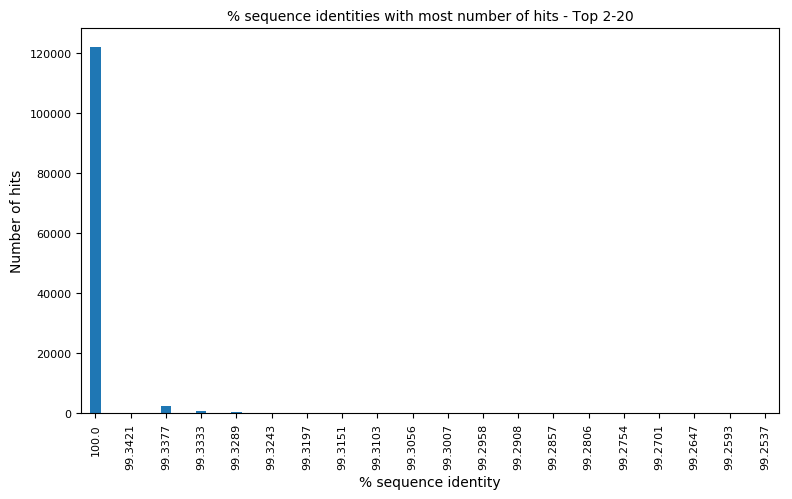

In [33]:
plt.style.use('default')
iden_counts_max_ident = mapped_aro_prevalence['% identity'].value_counts().to_frame('counts')
iden_counts_max_ident_sorted = iden_counts_max_ident.sort_index(ascending=False)
iden_counts_max_ident_sorted_top20 = iden_counts_max_ident_sorted.iloc[:20]
iden_counts_max_ident_sorted_top20_plot = iden_counts_max_ident_sorted_top20.plot(kind='bar', width=0.3,legend=False, figsize=(9,5), fontsize=8)
iden_counts_max_ident_sorted_top20_plot.set_xlabel("% sequence identity",size=10)
iden_counts_max_ident_sorted_top20_plot.set_ylabel("Number of hits",size=10)
iden_counts_max_ident_sorted_top20_plot.set_title("% sequence identities with most number of hits - Top 2-20",size=10)


Text(0.5,1,'Genes in organisms with most number of hits - Top 20')

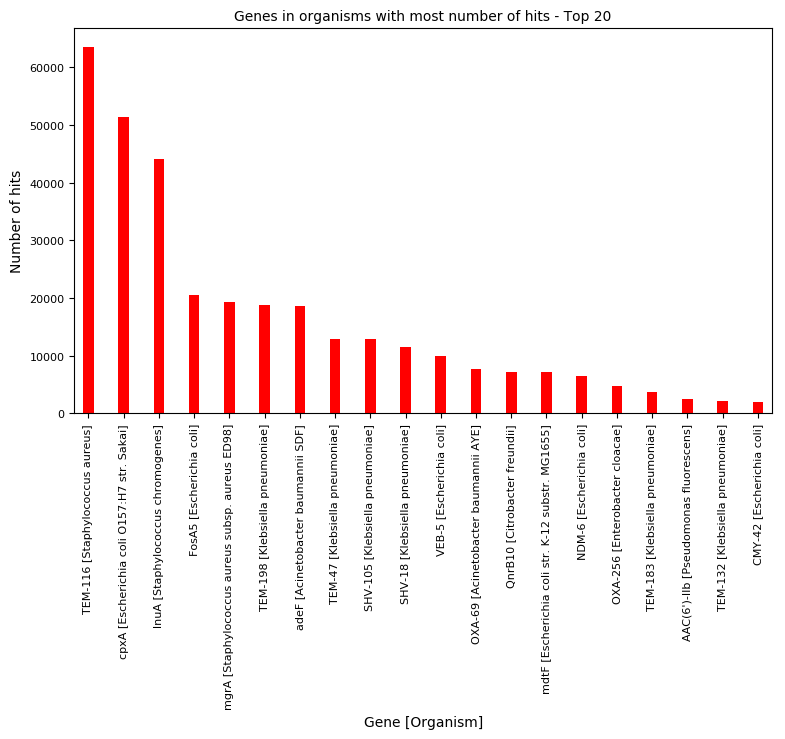

In [34]:
plt.style.use('default')
org_counts = mapped_aro_prevalence['Gene[Organism]'].value_counts().to_frame('counts')
org_counts_top20 = org_counts.iloc[:20]
org_counts_top20_plot = org_counts_top20.plot(kind='bar',color='red', width=0.3,legend=False, figsize=(9,5), fontsize=8)
org_counts_top20_plot.set_xlabel("Gene [Organism]",size=10)
org_counts_top20_plot.set_ylabel("Number of hits",size=10)
org_counts_top20_plot.set_title("Genes in organisms with most number of hits - Top 20",size=10)

Text(0.5,1,'AMR Gene Families with most number of hits - Top 20')

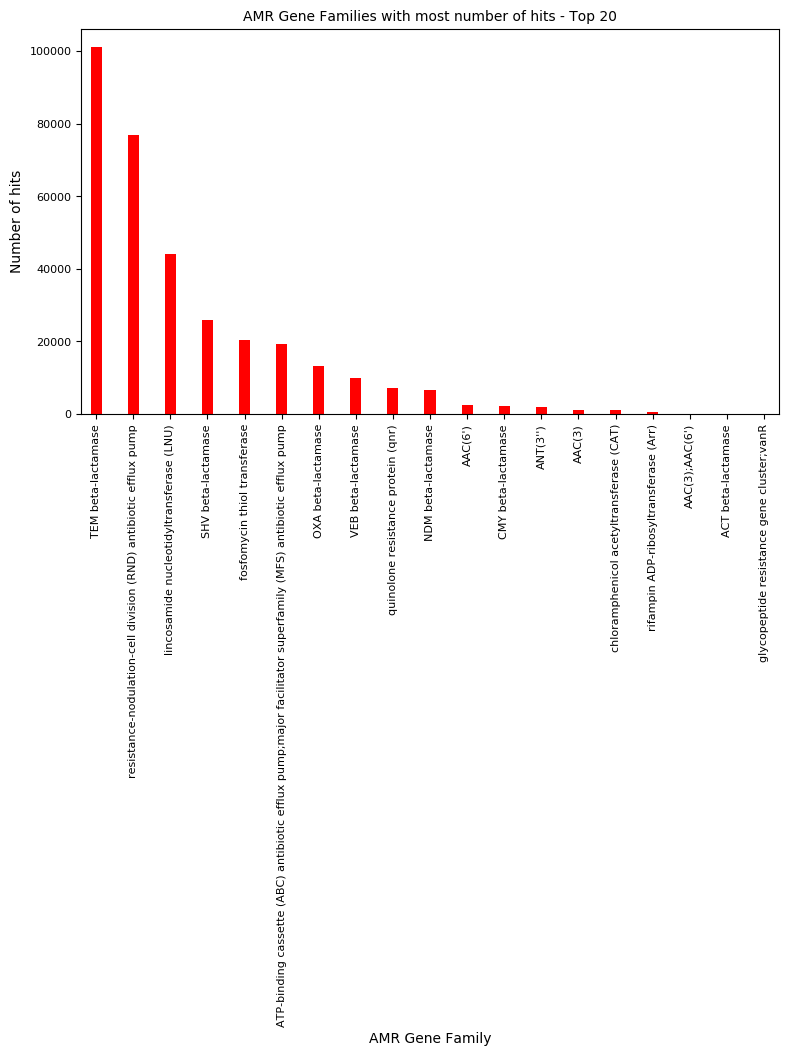

In [35]:
#mapped_aro_prevalence['AMR Gene Family'].value_counts()
plt.style.use('default')
genefam_counts = mapped_aro_prevalence['AMR Gene Family'].value_counts().to_frame('counts')
genefam_counts_top20 = genefam_counts.iloc[:20]
genefam_counts_top20_plot = genefam_counts_top20.plot(kind='bar',color='red',width=0.3, legend=False, figsize=(9,5), fontsize=8)
genefam_counts_top20_plot.set_xlabel("AMR Gene Family",size=10)
genefam_counts_top20_plot.set_ylabel("Number of hits",size=10)
genefam_counts_top20_plot.set_title("AMR Gene Families with most number of hits - Top 20",size=10)

In [36]:
import seaborn as sns
import glob 
counts_table = pd.DataFrame()
for file in glob.glob("*prev"): 
    df = pd.read_csv(file,sep="\t",header=0)
    df_counts = df['Gene[Organism]'].value_counts().to_frame(file.split(".")[0])
    counts_table = pd.concat([counts_table, df_counts], axis=1, join='outer')
    
counts_table

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,ERR1600430,ERR1600428,ERR1600427,ERR1600426,ERR1600429
AAC(3)-Ia [Pseudomonas aeruginosa],3913.0,273.0,4862.0,975.0,NaN
AAC(6')-IIb [Pseudomonas fluorescens],656.0,5394.0,628.0,2460.0,1434.0
AAC(6')-Ib [Klebsiella pneumoniae],1.0,NaN,174.0,49.0,1.0
AAC(6')-Iu [Acinetobacter genomosp. 17BJ],NaN,5038.0,422.0,NaN,342.0
ACT-29 [Enterobacter asburiae],390.0,NaN,88.0,46.0,NaN
CMY-42 [Escherichia coli],310.0,1515.0,745.0,1980.0,10825.0
CMY-48 [Citrobacter freundii],NaN,36.0,400.0,NaN,662.0
CMY-56 [Klebsiella pneumoniae],NaN,10750.0,998.0,12.0,678.0
CMY-70 [Citrobacter braakii],NaN,360.0,300.0,100.0,NaN
FosA2 [Enterobacter cloacae],NaN,456.0,5544.0,8.0,6696.0


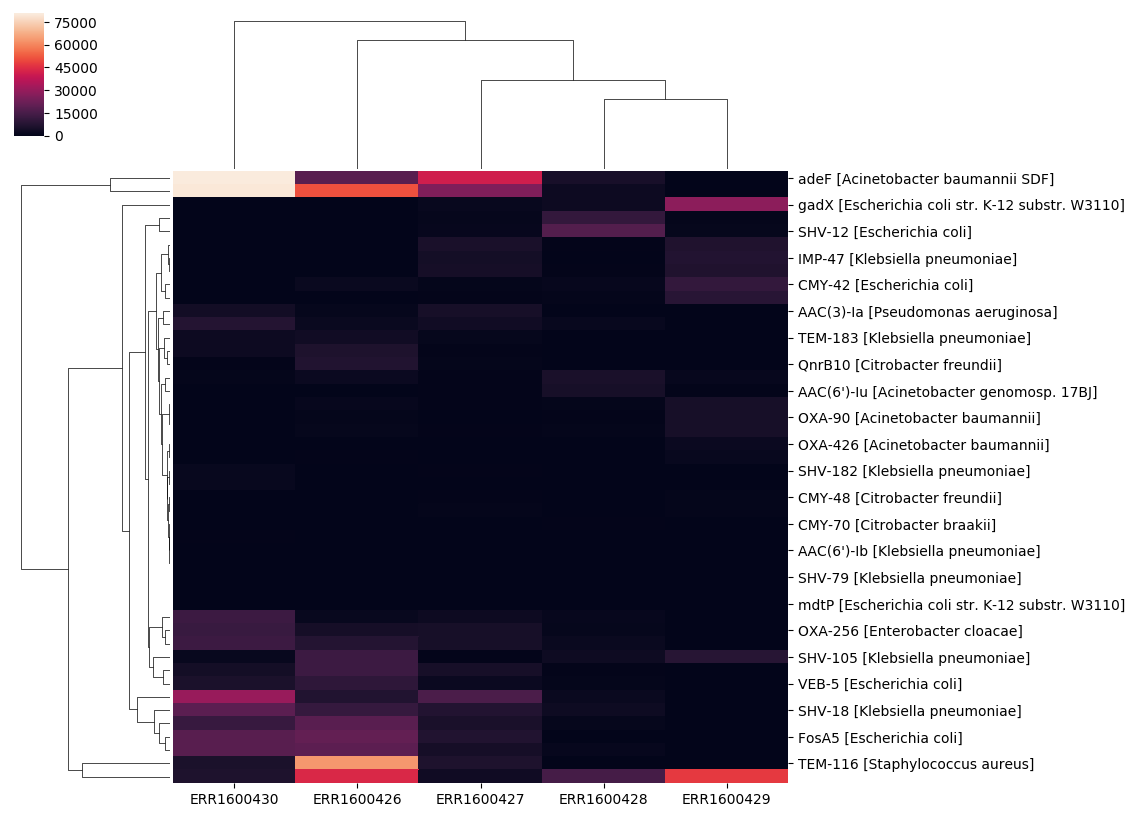

In [37]:
counts_table_fillna = counts_table.fillna(value=0)
import seaborn as sns
g = sns.clustermap(counts_table_fillna)